In [12]:
#importing the Dependencies

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [38]:
#importing the Boston House Price Data

In [39]:
house_price_dataframe= pd.read_csv('boston_house_prices.csv')

In [40]:
#print first 5 rows of our Dataframe

In [41]:
print(house_price_dataframe.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [42]:
#check number of rows and colums in a dataframe

In [43]:
print(house_price_dataframe.shape)

(506, 14)


In [44]:
#checking if there are any missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [45]:
#getting stastistical measures of the dataset
house_price_dataframe = house_price_dataframe.apply(pd.to_numeric, errors='coerce')

In [46]:
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [47]:
#understanding the correlation between various features in the dataset
#1. Positive Corelation
#2. Negative Corelation

In [48]:
correlation =house_price_dataframe.corr()

In [49]:
# constructing a heatmap to understand the correlation

<Axes: >

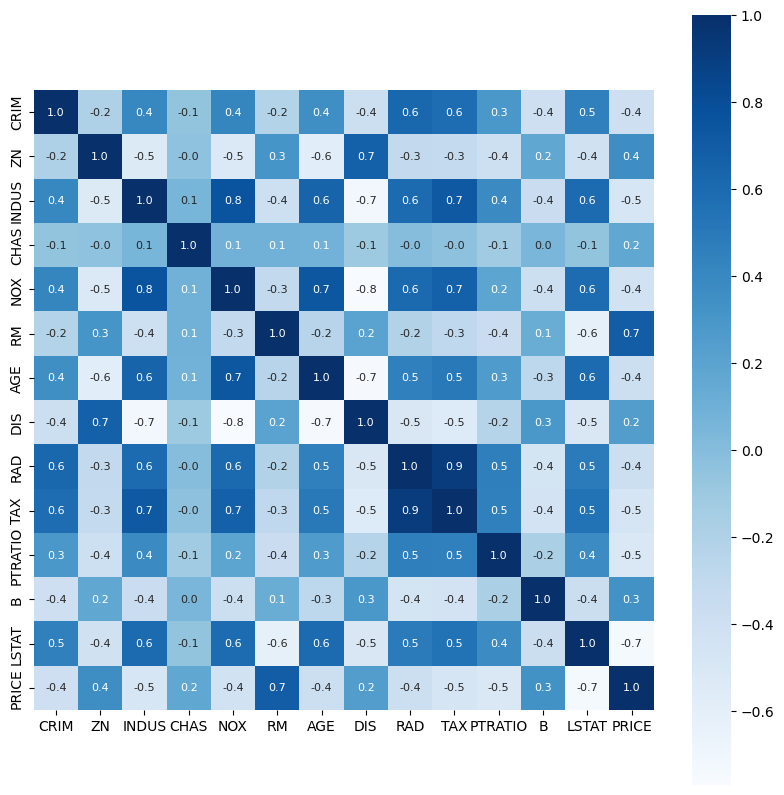

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [51]:
#Splitting the data and Target

In [53]:
print(list(house_price_dataframe.columns))
'PRICE' in house_price_dataframe.columns

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


True

In [56]:
X=house_price_dataframe.drop(['PRICE'], axis=1)


In [59]:
# Option 1: If you're unsure about the column name case, check available columns first
print("Available columns:", house_price_dataframe.columns.tolist())

# Option 2: Use the correct column name and specify axis=1 for columns
# The corrected line below assumes 'PRICE' is the correct column name
Y = house_price_dataframe.drop(['PRICE'], axis=1)  

# Option 3: If you want to extract the price column instead of dropping it
# This is often what you want when separating features from target variable
Y = house_price_dataframe['PRICE']  # Extract the price column
X = house_price_dataframe.drop(['PRICE'], axis=1)  # Keep all columns except PRICE

# Option 4: If you're uncertain about case, use case-insensitive matching
price_col = [col for col in house_price_dataframe.columns if col.upper() == 'PRICE']
if price_col:
    Y = house_price_dataframe[price_col[0]]
    X = house_price_dataframe.drop([price_col[0]], axis=1)
else:
    print("No 'PRICE' column found (case-insensitive)")

Available columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


In [60]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [61]:
#split the data into Training and Test data

In [65]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [66]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
Y_train shape: (404,)
Y_test shape: (102,)


In [67]:
#Model Training (XGBoost Regressor Model)

In [70]:
#loading the model

In [71]:
model= XGBRegressor()

In [72]:
#training the model with X_train

In [73]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [74]:
#Prediction on training data 

In [76]:
#accuracy for prediction on training data

In [77]:
training_data_prediction= model.predict(X_train)

In [78]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [79]:
# R squared error

In [80]:
score_1= metrics

In [81]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

In [82]:
score_2 =metrics.mean_absolute_error(Y_train, training_data_prediction)

In [83]:
print("R squared error :", score_1)

R squared error : 0.9999980039471451


In [84]:
print('Mean Absolute Error : ', score_2)

Mean Absolute Error :  0.0091330346494618


In [85]:
#Prediction on Test Data

In [86]:
# accuracy for prediction on test data

In [89]:
test_data_prediction = model.predict(X_test)

In [90]:
#R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

In [91]:
# Mean Absolute Error
score_2= metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R squared error :', score_1)
print('Mean Absolute Error :', score_2)




R squared error : 0.9051721149855378
Mean Absolute Error : 2.0748727686264927


In [94]:
#Visualizing the actual Prices and predicted prices

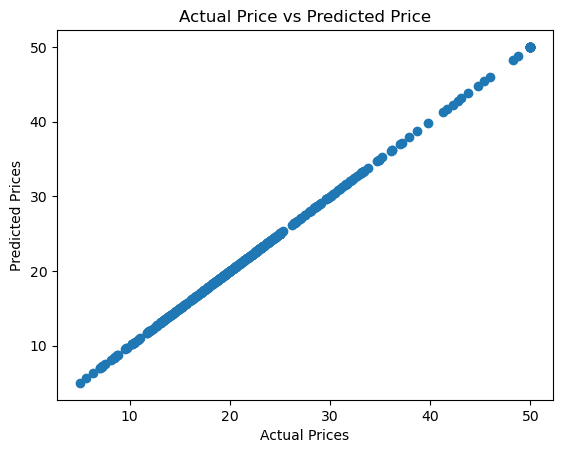

In [98]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()






In [92]:
print('R squared error :', score_1)
print('Mean Absolute Error :', score_2)

R squared error : 0.9051721149855378
Mean Absolute Error : 2.0748727686264927
